# Ford GoBike System Data Exploration
## by Victoria Perez Mola

## Introduction 

The dataset chosen to perform an analysis is the [Bay wheels (ex Ford GoBike) System Data](https://www.lyft.com/bikes/bay-wheels/system-data). 
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## The Data

Each trip is anonymized and includes:

* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

## Preliminary Wrangling

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from os import listdir
import datetime

%matplotlib inline

#set color palette for visualizations
base_color = sb.color_palette()[0]

Read all files from the Data folder and join them into one single dataset.

In [2]:
files_list = []
data_dir = 'Data'

# Define the columns I need from the files
columns = ['duration_sec','start_time','end_time','start_station_id','start_station_name',
           'start_station_latitude','start_station_longitude','end_station_id','end_station_name',
           'end_station_latitude','end_station_longitude','bike_id','user_type']

# read and append each file in the folder
for file in listdir(data_dir):
    files_list.append(pd.read_csv(data_dir+'/'+file,  usecols = lambda column : column in columns))
    
# assign the files data to a data frame    
df = pd.concat(files_list)

In [3]:
# Check dataframe
df.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
62932,1208,2019-11-18 14:32:50.0130,2019-11-18 14:52:58.6930,100.0,Bryant St at 15th St,37.767100,-122.410662,134.0,Valencia St at 24th St,37.752428,-122.420628,12471,Subscriber
218794,1293,2019-03-06 17:41:54.9910,2019-03-06 18:03:28.1610,66.0,3rd St at Townsend St,37.778742,-122.392741,105.0,16th St at Prosper St,37.764285,-122.431804,4432,Subscriber
189198,406,2019-10-07 16:36:30.6840,2019-10-07 16:43:17.5270,119.0,18th St at Noe St,37.761047,-122.432642,133.0,Valencia St at 22nd St,37.755213,-122.420975,11493,Subscriber


In [4]:
# check min and max date
(str(df.start_time.min())+' - '+str(df.start_time.max()))

'2019-03-01 00:00:20.6750 - 2020-03-01 23:56:31'

In [5]:
# Check the amount of data
df.shape

(2859697, 13)

In [6]:
#get information about the joint dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2859697 entries, 0 to 432353
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
dtypes: float64(6), int64(2), object(5)
memory usage: 305.4+ MB


In [7]:
# check unique values
df.nunique()

duration_sec                 15426
start_time                 2810872
end_time                   2810564
start_station_id               446
start_station_name             460
start_station_latitude      296493
start_station_longitude     312608
end_station_id                 446
end_station_name               460
end_station_latitude        299332
end_station_longitude       316227
bike_id                      13218
user_type                        2
dtype: int64

In [8]:
#check missing data
df.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           500488
start_station_name         499307
start_station_latitude          0
start_station_longitude         0
end_station_id             502537
end_station_name           501408
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
dtype: int64

- More stations are missing the start_station_id than the end_station_id
- More stations are missing the start_station_id than the start_station_name         
- More stations are missing the end_station_id than the end_station_name

In [9]:
# check duplicated
df.duplicated().sum()

0

### Data issues
After performing some data exploration, I've found the following quality issues:

- fields start_time and end_time should be datetime
- start_station_id and end_station_id are float, should be categorical variables
- user_type should be category: Suscriber, Customer
- Start_station_id and end_station_id and names are missing for a great part of the records, but their latitudes aren't


In [10]:
# correct datatypes
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.user_type = df.user_type.astype('category')

# covert to str and remove the decimals from float 
df.start_station_id = df.start_station_id.astype(str).str[:-2]
df.end_station_id = df.end_station_id.astype(str).str[:-2]

# convert to category 
df.start_station_id = df.start_station_id.astype('category')
df.end_station_id = df.end_station_id.astype('category')

In [11]:
# check the descriptive statistics of the dataset 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id
count,2859697.00,2859697.00,2859697.00,2859697.00,2859697.00,2859697.00
mean,813.08,37.76,-122.35,37.76,-122.35,112635.44
std,1934.53,0.17,0.46,0.26,0.77,232354.15
min,60.00,0.00,-122.51,0.00,-122.58,4.00
25%,366.00,37.77,-122.42,37.77,-122.41,2306.00
50%,583.00,37.78,-122.40,37.78,-122.40,6414.00
75%,907.00,37.79,-122.39,37.80,-122.39,12544.00
max,912110.00,45.51,0.00,45.51,0.00,999960.00


The duration in seconds, could be set to minutes. 
The max value sems to be wrong 912110 seconds would mean a bike rental of 10 days and it doesn't make sense with the rest of the descriptive statistics of the set. 

In [12]:
# check the modified dataset
df.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
97378,253,2019-04-15 19:44:54.978,2019-04-15 19:49:08.397,343,Bryant St at 2nd St,37.78,-122.39,21,Montgomery St BART Station (Market St at 2nd St),37.79,-122.40,114,Subscriber
106848,310,2019-11-12 09:41:34.743,2019-11-12 09:46:45.349,176,MacArthur BART Station,37.83,-122.27,212,Mosswood Park,37.82,-122.26,12222,Subscriber
164568,271,2019-11-04 08:56:19.702,2019-11-04 09:00:51.364,193,Grand Ave at Santa Clara Ave,37.81,-122.25,196,Grand Ave at Perkins St,37.81,-122.26,2779,Subscriber


### What is the structure of your dataset?
The dataset contains almost 3M ride records, 13218 different bikes and 446 defined stations. 
Is conformed by one single table where each row represents a single trip and its features of different natures.

### What is/are the main feature(s) of interest in your dataset?

I'm interested in finding trends in the data related to when the rides take place. 
Some of the questions I'm looking to answer: 

* Is there any peak on the rides any particular time of the day?
* Does this has any relation with the user type?
* Does this varies weekdays vs weekends? 
* Does the season of the year affects the frequency of the rides? 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The main features of interest are the station ids, the user type and the start and end time of the rides. 
To answer the questions I've postulated the start time and end time are with no doubt the most important ones, and the features that more analysis and transformation will need. With this information I could extract the lenght, time of the day, the day of the week, and the season the trips are taking place. 

I will also need the user type and the stations ids to add information on the previous variables and to find correlations between the data.

## Univariate Exploration

I will explore the distribution of the rides accorss different time measures: hour of the day, day of the week and month of the year. 
I want to have a first look to find the trends. 

#### Number of Rides Across Different Hours of the Day, days of the week and month of the year

To make it easier to analyze I'll transform the start_time field into three new fields adapted to the needs of my analysis: hour, day and month. 
Since the bike sharing is intended to be for short periods of time, I'll take in consideration only the start time of the ride for this purpose. 

In [13]:
# I'll add an hours, weekday and month column to to facilitate the analysis
df['start_hour'] = df.start_time.dt.hour
df['start_month'] = df.start_time.dt.month

# get the day of the week as an integer, where Monday is 0 and Sunday is 6
df['start_day'] = df.start_time.dt.weekday

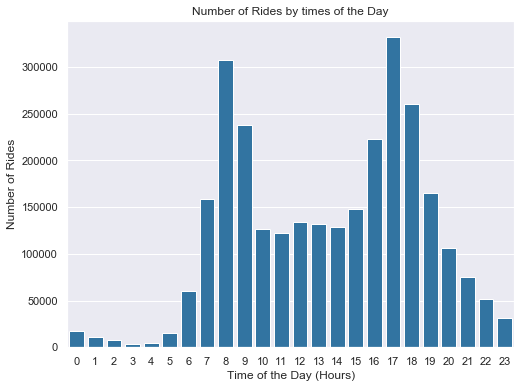

In [14]:
#plot the number of rides per hour of the day
sb.set(rc={'figure.figsize':(8,6)})

sb.countplot(data = df, x = 'start_hour', color = base_color);

plt.xlabel("Time of the Day (Hours)")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by times of the Day");

It's clear that there are two peaks in the time of the day there are more rides: around 8 and around 17. 

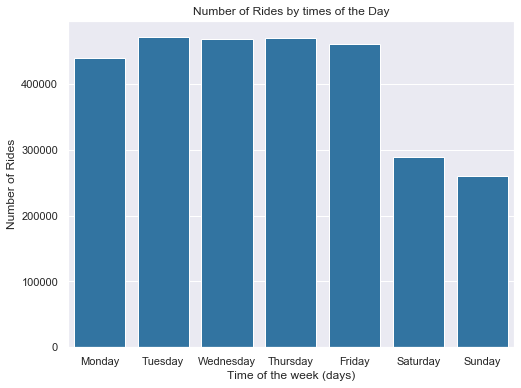

In [15]:
#plot the number of rides per weekday

# replace the 0-7 numbers for the name of the weekday
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sb.set(rc={'figure.figsize':(8,6)})

ax = sb.countplot(data = df, x = 'start_day',
             color = base_color);

ax.set(xticks=range(7), xticklabels=labels)

plt.xlabel("Time of the week (days)")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by times of the Day");

Although there's a lower frequency on Mondays than the other days, it's clear that the demand is much higher from monday to Friday than during the weekends. 
It would be interesting to see if this has any impact on the peka hours seen in the graph above.

In [16]:
#create two dataframes to separete weekdays from weekends
weekday = [0,1,2,3,4,5]
weekend = [6,7]

df_weekday = df[df['start_day'].isin(weekday)]
df_weekend = df[df['start_day'].isin(weekend)]

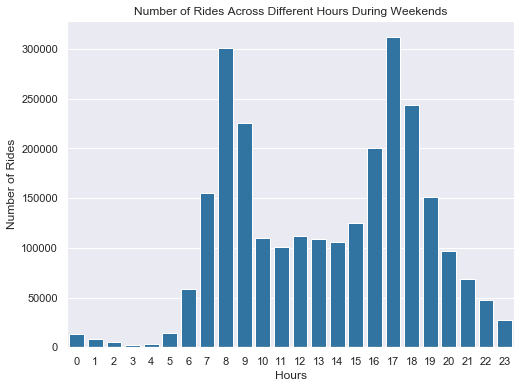

In [17]:
#plot the number of rides during different hours in the week days 
sb.countplot(data = df_weekday, x = 'start_hour', color = base_color);
plt.xlabel("Hours")
plt.ylabel("Number of Rides")
plt.title("Number of Rides Across Different Hours During Weekends");

The peak hours are around 8 and 17, as seen in the whole data. 

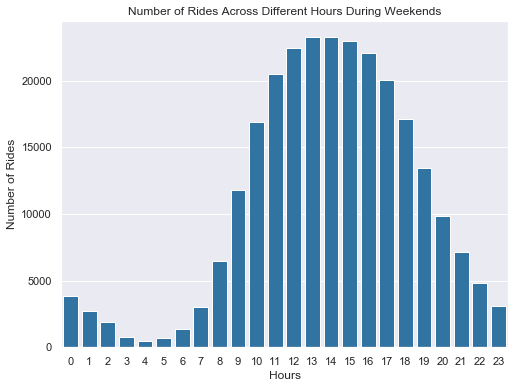

In [18]:
#plot the number of rides during different hours in the weekend 
sb.countplot(data = df_weekend, x = 'start_hour', color = base_color);
plt.xlabel("Hours")
plt.ylabel("Number of Rides")
plt.title("Number of Rides Across Different Hours During Weekends");

The peak hours change during the weekends, and instead of having two well defined peaks along the day it has a more established distribution along the day, and one peak only around 13 and 14 hours. 

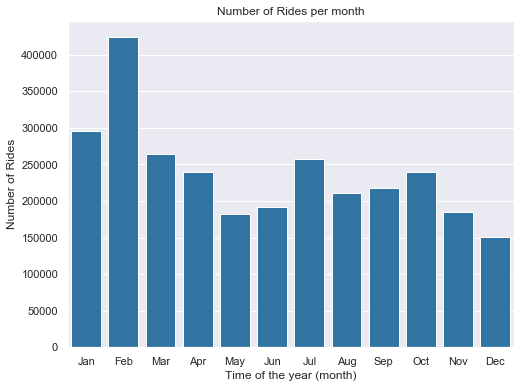

In [19]:
#plot the number of rides per month

# replace the 0-12 numbers for the name of the months
labels = ['Jan', 'Feb','Mar','Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']

sb.set(rc={'figure.figsize':(8,6)})

ax = sb.countplot(data = df, x = 'start_month', color = base_color);

ax.set(xticks=range(12), xticklabels=labels)

plt.xlabel("Time of the year (month)")
plt.ylabel("Number of Rides")
plt.title("Number of Rides per month");

It looks like there has been a peak during the months of January and February, the rest of the months we can see that the amount of rides goes up and down, but to a lesser extent. 
It's important to have in mind that the dataset goes from March 2019 to february 2019, so the increase in January and February could also be a general growth of the service and not exactly because of the month. 


#### Types of users
I want to see what share of trips are done by subscribers

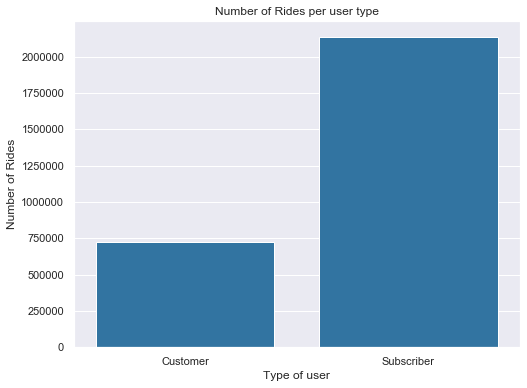

In [20]:
# plot the number of rides by user type

sb.set(rc={'figure.figsize':(8,6)})

sb.countplot(data = df, x = 'user_type', color = base_color);


plt.xlabel("Type of user")
plt.ylabel("Number of Rides")
plt.title("Number of Rides per user type");

The majority of the trips are done by suscribers rather than casual customers. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

After performing tthe data exploration, I realized that the rides are more frequent during working days than during the weekend, and during peak times (around 8 and 17 hs). 
Additionally, it can be seen that although in general the peak hours are those, when seen with more focus on the weekends, the peak days differ and the distribution is along the day and one peak only around 13 and 14 hours.
Regarding the months, there was a peak on the frequency during the most recent months of the dataset, especially during february, but it's not possible to say that is related to the month itself or simply to a general increase of the demand. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
I haven't find any unusual distributions in the data. I had to perfrom some changes in the data format to be able to answers the questions that I had proposed. 


## Bivariate Exploration
I want to combine the variables explored before to see if the trends are somehow related. 

#### Duration of the ride vs Day of the week 

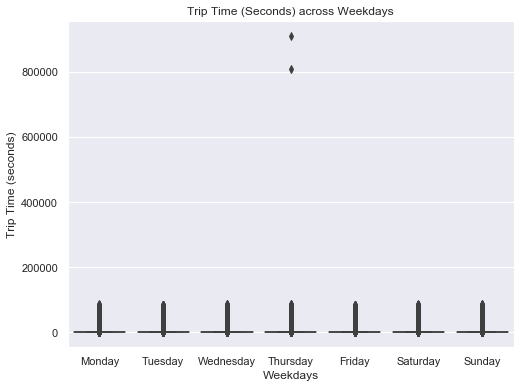

In [21]:
#plot trip time across different days of the week

# replace the 0-7 numbers for the name of the weekday
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sb.boxplot(data = df, x = 'start_day', y = 'duration_sec', color = base_color);

ax.set(xticks=range(7), xticklabels=labels)

plt.xlabel("Weekdays")
plt.ylabel("Trip Time (seconds)")
plt.title("Trip Time (Seconds) across Weekdays");

Because of the outeliers, that we saw in the descriptive statistics of the dataset, is hard to see the data. 
I'll add a log scale

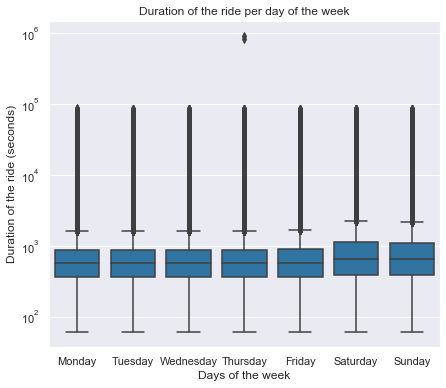

In [22]:
#plot trip time across different days of the week

# replace the 0-7 numbers for the name of the weekday
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")

ax = sb.boxplot(data = df, x = 'start_day', y = 'duration_sec', color = base_color);

ax.set(xticks=range(7), xticklabels=labels)

plt.xlabel("Days of the week")
plt.ylabel("Duration of the ride (seconds)")
plt.title("Duration of the ride per day of the week");

It seems to be that the day of the week has an impact on the duration of the ride. Form Monday to Friday the average duration of the ride behaves in a very similar wat, but during Saturday and Sunday the duration of the ride has a slightly higher median and greater standard deviation. 

#### Duration of the ride per month 

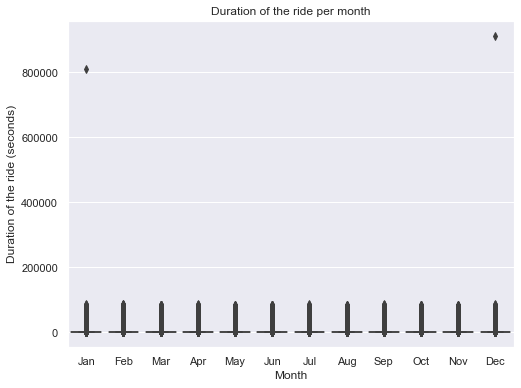

In [23]:
#plot trip time across different days of the week

# replace the 0-12 numbers for the name of the months
labels = ['Jan', 'Feb','Mar','Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']

ax = sb.boxplot(data = df, x = 'start_month', y = 'duration_sec', color = base_color);

ax.set(xticks=range(12), xticklabels=labels)

plt.xlabel("Month")
plt.ylabel("Duration of the ride (seconds)")
plt.title("Duration of the ride per month");

Because of the outeliers, that we saw in the descriptive statistics of the dataset, is hard to see the data. 
I'll add a log scale

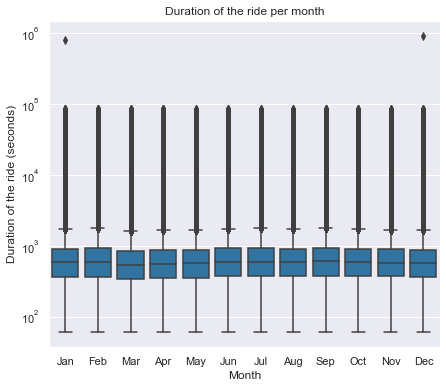

In [24]:
#plot trip time across different days of the week

# replace the 0-12 numbers for the name of the months
labels = ['Jan', 'Feb','Mar','Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")

ax = sb.boxplot(data = df, x = 'start_month', y = 'duration_sec', color = base_color);

ax.set(xticks=range(12), xticklabels=labels)

plt.xlabel("Month")
plt.ylabel("Duration of the ride (seconds)")
plt.title("Duration of the ride per month");

There are smalls variations along the months, but overall the duration of the ride keeps a similar average duration the whole year long

#### Duration of rides vs user type


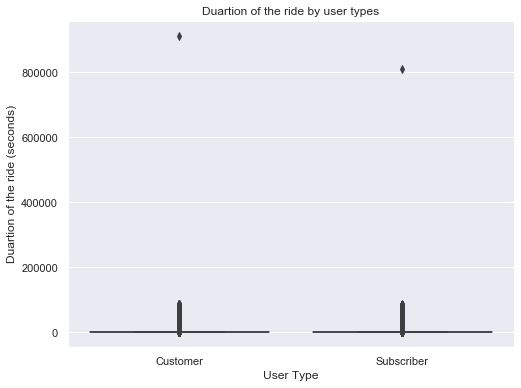

In [25]:
#plot duration vs user_type

sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color);

plt.xlabel("User Type")
plt.ylabel("Duartion of the ride (seconds)")
plt.title("Duartion of the ride by user types");

Again nothing can be seen because of the two outeliers, I'll apply a log scale

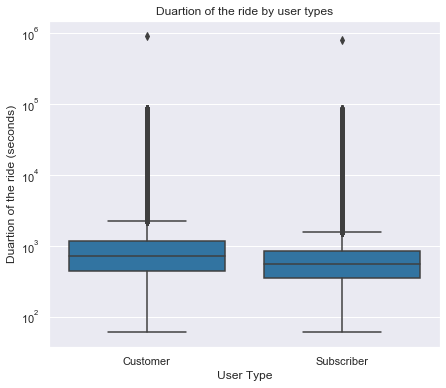

In [26]:
#plot duration vs user_type with a log scale

f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")

sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color);
plt.xlabel("User Type")
plt.ylabel("Duartion of the ride (seconds)")
plt.title("Duartion of the ride by user types");

Although, the majority of the trips are done by suscribers it can be seen that the the duration of rides of casual customerss are higher. 


### Talk about some of the relationships I observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

During this part of the exploration phase we could see in more detail the avergae duration of the trip and how it's related to user type, day of the week, and month. 

The suscribers tend to have an average ride shorter than the casual customers. 

There's also a difference in the average during the weekends, rides tend to be slightly longer and have more variation in duration on weekends compared to weekdays.

### Did I observe any interesting relationships between the other features (not the main feature(s) of interest)?

since the analysis was menat to deepen on the variables explored in the univariate exploration, no new relationship, not expected was observed.

## Multivariate Exploration


#### Duration of rides per day of the week by user type
I'll plot the distribution of the duration of the ride along the week divided by user type.

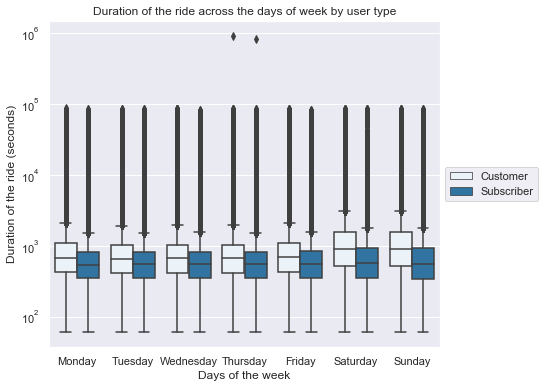

In [27]:
#plot trip time across different days of the week

# replace the 0-7 numbers for the name of the weekday
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#set log scale fro outeliers
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")

ax = sb.boxplot(data = df, x = 'start_day', y = 'duration_sec', color = base_color, hue = 'user_type');

# labels box outside the graph
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))
ax.set(xticks=range(7), xticklabels=labels)

plt.xlabel("Days of the week")
plt.ylabel("Duration of the ride (seconds)")
plt.title("Duration of the ride across the days of week by user type");

As seen before, while observing the average duration of the rides per weekday, the duration increases during the weekend. This is trend that can be seen clearly for the casual customers, but not so clear for the suscribers. 

#### Amount of rides per time of the day by user type
We've seen that the peak hours change between weekdays and weekends, and the average ride is longer for customer than for suscribers, I want to see if these changes are also seen in the time that the ride is started. 

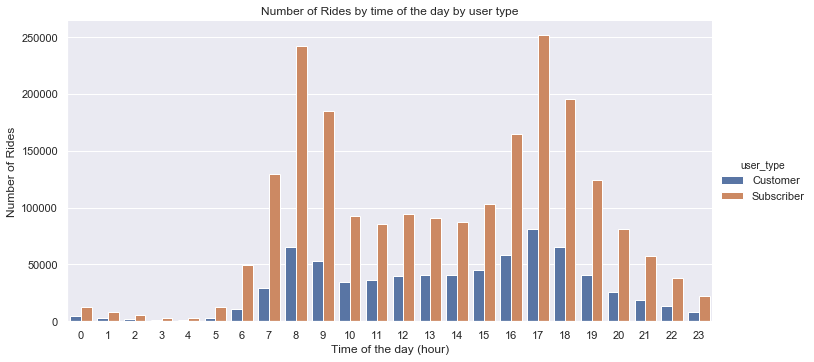

In [28]:
#plot the number of rides per time of the dayper user_type
sb.catplot(x='start_hour', hue='user_type', kind='count', data=df,height=5, aspect=2);

plt.xlabel("Time of the day (hour)")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by time of the day by user type");

We can still see the peaks around 8 and 17 for both user types, but the peak is higher for suscibers than casual customers

#### Amount of rides per day of the week by user type
I'll plot the distribution of the rides along the week divided by user type.

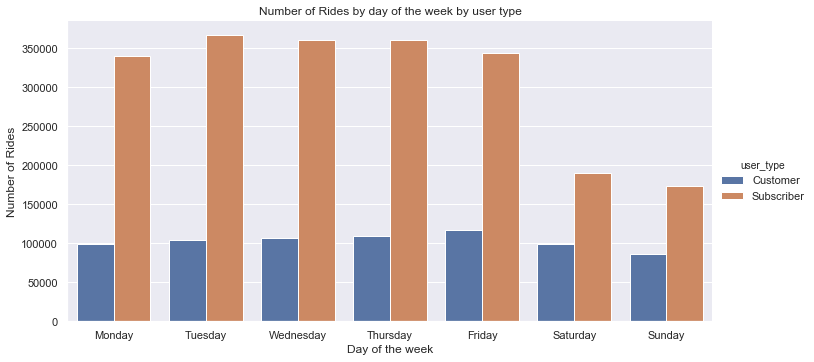

In [29]:
#plot the number of rides per day of week per user_type

# replace the 0-7 numbers for the name of the weekday
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sb.catplot(x='start_day', hue='user_type', kind='count', data=df,height=5, aspect=2);

ax.set(xticks=range(7), xticklabels=labels)

plt.xlabel("Day of the week")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by day of the week by user type");

For both user types the behaviour is similar and the same as observed so far, during the weekends the amount of rides is lower than during the rest of the week. 
Although for casual customers, the difference is less noticeable than the one observed for suscribers, where the amount of rides decreases almost a half. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

During this part of the exploration phase we could see in more detail how the user type affects the variables seen in the previous section. 
It was clear that suscribers use the bikes more during the weekdays than weekends, and although this tendency can be seen in casual customers as well, the decrease in the demand is lower. Something similar could be seen with the hours of use, but overall the same behaviour was observed along both user types. 

### Were there any interesting or surprising interactions between features?

It was clear from the last graph that the proportion of rides done by casual customers increased drastically over the weekend compared to the ones from customer. Combined with all the previos observations like peak hours and avera

## Conclusions

Most of the rides take place on weekdays and more specaifically during peak hours (exactly at 8am and 5pm) and with a ride with and avergae duration of 13 minutes. 
All of this leads me to think that the main target group are sucribers who use the bike sharing service to commute to work. 

On the contrary, casual customers tend to have slightier longer rides and there's not much difference between working days and weekends. Even though this a small share of the rides compare to suscribers, even during weekends, I think that there is an opportunity to offer suscription deals for this users whose main purpose of the rides seems to be leisure. 


## References
- [How to plot categorical data](http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot)

In [30]:
# save modified dataframe
df.to_csv('Results/baywheels-tripdata.csv')